In [188]:
import tensorflow-gpu as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dense , Flatten , Dropout
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import cv2
import os
import matplotlib.image as mpimg
import PIL
import PIL.Image
import pathlib
import h5py

SyntaxError: invalid syntax (364822867.py, line 1)

In [187]:
!pip install tensorflow tensorflow-gpu

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Mahran\\anaconda3\\Lib\\site-packages\\google\\protobuf\\internal\\_api_implementation.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached protobuf-3.19.6-cp39-cp39-win_amd64.whl (895 kB)
  Using cached tensorflow_gpu-2.10.0-cp39-cp39-win_amd64.whl (455.9 MB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.1
    Uninstalling protobuf-3.20.1:
      Successfully uninstalled protobuf-3.20.1
  Rolling back uninstall of protobuf
  Moving to c:\users\mahran\anaconda3\lib\site-packages\protobuf-3.20.1-py3.9.egg-info
   from C:\Users\Mahran\anaconda3\Lib\site-packages\~rotobuf-3.20.1-py3.9.egg-info
  Using cached absl_py-1.3.0-py3-none-any.whl (124 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached protobuf-3.19.6-cp39-cp39-win_amd64.whl (895 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached tensorflow_gpu-2.10.1-cp39-cp39-win_amd64.whl (455.9 MB)
  Using cached tensorflow_gpu-2.10.0-cp39-cp39-win_amd64.whl (455.9 MB)
  Attempting uninstall: protobuf
    Found existing installation: 

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Mahran\\anaconda3\\Lib\\site-packages\\google\\protobuf\\internal\\_api_implementation.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [182]:
tf.config.list_physical_devices('GPU')

[]

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
Data = "/content/drive/MyDrive/Colab Notebooks/Angle_of_Access"
Categ = ['Easy_Angle_of_Access','Difficult_Angle_of_Access']


In [27]:
img_height =252
img_width = 252

In [35]:
training_data = tf.keras.preprocessing.image_dataset_from_directory("Angle_of_Access"
,labels = 'inferred',
label_mode = "binary",
color_mode = 'rgb',
batch_size=2,
image_size=(img_height,img_width),
shuffle =True,
seed=123,
validation_split=0.1,
subset='training')

Found 61 files belonging to 2 classes.
Using 55 files for training.


In [36]:
testing_data =tf.keras.preprocessing.image_dataset_from_directory("Angle_of_Access"
,labels = 'inferred',
label_mode = "binary",
color_mode = 'rgb',
batch_size=2,
image_size=(img_height,img_width),
shuffle =True,
seed=123,
validation_split=0.1,
subset='validation')

Found 61 files belonging to 2 classes.
Using 6 files for validation.


In [30]:
testing_data.class_names
data_iterator=testing_data.as_numpy_iterator()

In [31]:
batch = data_iterator.next()

C:\Users\Mahran\anaconda3\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


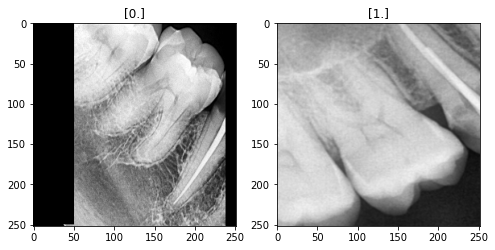

In [11]:
fig, ax = plt.subplots(ncols=2, figsize=(8,8))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [32]:
def aug (x,y):
        img = tf.image.random_brightness(x, max_delta=0.02)
        #img = tf.image.random_contrast(x, lower=0.6, upper=1)
        img = tf.image.random_flip_left_right(x)
        #img = tf.image.random_jpeg_quality(x, min_jpeg_quality=90, max_jpeg_quality=100)
        img = tf.image.random_saturation(x, lower=0.9,upper=1)
        return img , y


In [33]:
training_data = training_data.map(aug)


# <center> Build and train CNN for Angle of Access </center>

In [53]:
AOA_Model = Sequential([
    Conv2D(filters = 32 , kernel_size = (3,3), activation = 'relu', padding ='same',input_shape=(img_height,img_width,3)),
    MaxPooling2D(pool_size=(2,2),strides=2),

    Conv2D(filters = 32 , kernel_size = (3,3), activation = 'relu', padding ='same'),
    MaxPooling2D(pool_size=(2,2),strides=2),

    Conv2D(filters = 64 , kernel_size = (3,3), activation = 'relu', padding ='same'),
    MaxPooling2D(pool_size=(2,2),strides=2),

    Flatten(),
    Dense(units=64,activation = 'relu'),
    Dropout(0.5),
    Dense(units=1,activation='sigmoid')
])

In [61]:
filepath = 'Saved_Models/weights-Improvement-{epoch:02d}-{val_acc:.2f}.hdf5'
checkpoint = ModelCheckpoint(filepath,monitor='val_acc',verbose =1 , save_best_only=True , mode='max')
callbacks_list = {checkpoint}

In [62]:
AOA_Model.save('AngleOfAccess_Model.h5')

In [15]:
model.compile(loss='binary_crossentropy',optimizer ="adam",metrics=['accuracy'])

In [16]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='logs')

In [17]:
hist =model.fit(training_data,verbose=1,epochs=15,validation_data=testing_data)

Epoch 1/15
28/28 [==============================] - 2s 53ms/step - loss: 86.2004 - accuracy: 0.6182 - val_loss: 0.9906 - val_accuracy: 0.6667
Epoch 2/15
28/28 [==============================] - 1s 31ms/step - loss: 0.6776 - accuracy: 0.5455 - val_loss: 0.4834 - val_accuracy: 1.0000
Epoch 3/15
28/28 [==============================] - 1s 39ms/step - loss: 0.5557 - accuracy: 0.8364 - val_loss: 1.1651 - val_accuracy: 0.6667
Epoch 4/15
28/28 [==============================] - 1s 37ms/step - loss: 0.4146 - accuracy: 0.7455 - val_loss: 0.3556 - val_accuracy: 1.0000
Epoch 5/15
28/28 [==============================] - 1s 29ms/step - loss: 0.2838 - accuracy: 0.8727 - val_loss: 0.4154 - val_accuracy: 0.8333
Epoch 6/15
28/28 [==============================] - 1s 36ms/step - loss: 0.1630 - accuracy: 0.9455 - val_loss: 0.6771 - val_accuracy: 0.6667
Epoch 7/15
28/28 [==============================] - 1s 42ms/step - loss: 0.0741 - accuracy: 1.0000 - val_loss: 0.6846 - val_accuracy: 0.8333
Epoch 8/15
2

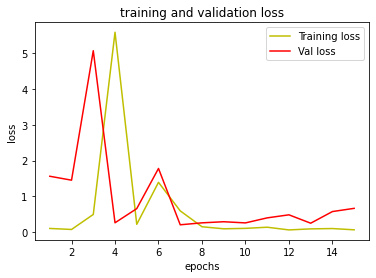

In [75]:
loss = hist.history['loss']
val_loss=hist.history['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label='Training loss')
plt.plot(epochs,val_loss,'r',label="Val loss")
plt.title('training and validation loss')
plt.xlabel("epochs")
plt.ylabel('loss')
plt.legend()
plt.show()


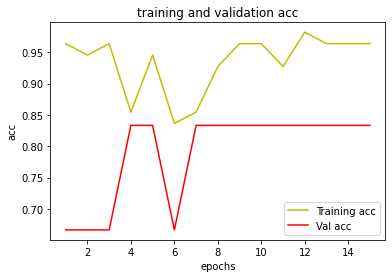

In [76]:
acc = hist.history['accuracy']
val_acc=hist.history['val_accuracy']
plt.plot(epochs,acc,'y',label='Training acc')
plt.plot(epochs,val_acc,'r',label="Val acc")
plt.title('training and validation acc')
plt.xlabel("epochs")
plt.ylabel('acc')
plt.legend()
plt.show()

In [79]:
img = "/content/drive/MyDrive/Colab Notebooks/image008.png"
img = cv2.imread(img)
img =cv2.resize(img,(img_height,img_width))
img = np.array(img)
img_i=np.expand_dims(img,axis=0)


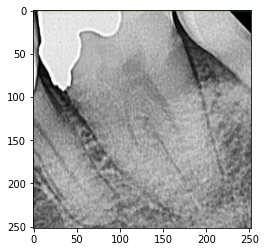

In [80]:
plt.imshow(img)

In [81]:
yhat = model.predict(img_i)

1/1 [==============================] - 0s 48ms/step


In [82]:
if yhat > 0.5: 
        print(f'Predicted class is Easy Angle of Access')
else:
    print(f'Predicted class is Difficult Angle of Access')

Predicted class is Easy Angle of Access


In [24]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

pre = Precision()
re = Recall()
acc = BinaryAccuracy()

for batch in testing_data.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)


1/1 [==============================] - 0s 90ms/step


In [25]:
    
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.5, shape=(), dtype=float32) tf.Tensor(0.8333333, shape=(), dtype=float32)


# <center> Model 2 </center>

### Define Model for S-Shaped Classification


In [108]:
ModelS_Shaped = Sequential([
    Conv2D(filters = 32 , kernel_size = (3,3), activation = 'relu', padding ='same',input_shape=(150,150,3)),
    MaxPooling2D(pool_size=(2,2),strides=2),

    Conv2D(filters = 32 , kernel_size = (3,3), activation = 'relu', padding ='same'),
    MaxPooling2D(pool_size=(2,2),strides=2),

    Conv2D(filters = 64 , kernel_size = (3,3), activation = 'relu', padding ='same'),
    MaxPooling2D(pool_size=(2,2),strides=2),

    Flatten(),
    Dense(units=64,activation = 'relu'),
    Dropout(0.5),
    Dense(units=1,activation='sigmoid')
])

In [109]:
ModelS_Shaped.compile(loss='binary_crossentropy',optimizer ="adam",metrics=['accuracy'])

In [110]:
from keras.callbacks import ModelCheckpoint

In [149]:
train_datagen = ImageDataGenerator(
                            rescale=1./255,
                            rotation_range=45,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True)

val_datagen = ImageDataGenerator(
                            rescale=1./255,validation_split=0.1)


In [150]:
train_generator = train_datagen.flow_from_directory(
                        'S-Shaped',#input dir,
                        target_size=(150,150), #all images wil be resized to 64x64
                        batch_size=16,
                        class_mode = 'binary',
                        subset='training')
val_generator = val_datagen.flow_from_directory(
                        'S-Shaped',#input dir,
                        target_size=(150,150), #all images wil be resized to 64x64
                        batch_size=16,
                        class_mode = 'binary',
                        subset='validation')

Found 51 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


In [169]:
filepath = "weights-improvement.hdf5"
checkpoint = ModelCheckpoint(filepath,monitor='val_acc',verbose =1 , save_best_only=True , mode='max')
callbacks_list = [checkpoint]

In [170]:
ModelS_Shaped.save('S-Shaped_Model.h5')

In [179]:
hist = ModelS_Shaped.fit(
train_generator,
epochs=100,
validation_data=val_generator,
callbacks=callbacks_list)

Epoch 1/100
4/4 [==============================] - 1s 132ms/step - loss: 0.2690 - accuracy: 0.9412 - val_loss: 0.0446 - val_accuracy: 1.0000
Epoch 2/100
4/4 [==============================] - 1s 176ms/step - loss: 0.2452 - accuracy: 0.9412 - val_loss: 0.1332 - val_accuracy: 1.0000
Epoch 3/100
4/4 [==============================] - 1s 163ms/step - loss: 0.2512 - accuracy: 0.9412 - val_loss: 0.0500 - val_accuracy: 1.0000
Epoch 4/100
4/4 [==============================] - 1s 134ms/step - loss: 0.3571 - accuracy: 0.9412 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 5/100
4/4 [==============================] - 1s 121ms/step - loss: 0.3153 - accuracy: 0.9412 - val_loss: 0.0667 - val_accuracy: 1.0000
Epoch 6/100
4/4 [==============================] - 1s 142ms/step - loss: 0.2428 - accuracy: 0.9412 - val_loss: 0.1153 - val_accuracy: 1.0000
Epoch 7/100
4/4 [==============================] - 1s 144ms/step - loss: 0.2555 - accuracy: 0.9412 - val_loss: 0.0973 - val_accuracy: 1.0000
Epoch 8/100
4

4/4 [==============================] - 1s 116ms/step - loss: 0.2378 - accuracy: 0.9412 - val_loss: 0.0745 - val_accuracy: 1.0000
Epoch 29/100
4/4 [==============================] - 1s 183ms/step - loss: 0.1854 - accuracy: 0.9412 - val_loss: 0.0214 - val_accuracy: 1.0000
Epoch 30/100
4/4 [==============================] - 1s 130ms/step - loss: 0.2970 - accuracy: 0.9412 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 31/100
4/4 [==============================] - 1s 143ms/step - loss: 0.2180 - accuracy: 0.9412 - val_loss: 0.1140 - val_accuracy: 1.0000
Epoch 32/100
4/4 [==============================] - 1s 127ms/step - loss: 0.2318 - accuracy: 0.9412 - val_loss: 0.1266 - val_accuracy: 1.0000
Epoch 33/100
4/4 [==============================] - 1s 159ms/step - loss: 0.1893 - accuracy: 0.9412 - val_loss: 0.0513 - val_accuracy: 1.0000
Epoch 34/100
4/4 [==============================] - 1s 127ms/step - loss: 0.2021 - accuracy: 0.9412 - val_loss: 0.0731 - val_accuracy: 1.0000
Epoch 35/100
4/4 [=

Epoch 56/100
4/4 [==============================] - 1s 121ms/step - loss: 0.1699 - accuracy: 0.9412 - val_loss: 0.0516 - val_accuracy: 1.0000
Epoch 57/100
4/4 [==============================] - 1s 146ms/step - loss: 0.1744 - accuracy: 0.9412 - val_loss: 0.0339 - val_accuracy: 1.0000
Epoch 58/100
4/4 [==============================] - 1s 133ms/step - loss: 0.1807 - accuracy: 0.9412 - val_loss: 0.0191 - val_accuracy: 1.0000
Epoch 59/100
4/4 [==============================] - 1s 166ms/step - loss: 0.2003 - accuracy: 0.9412 - val_loss: 0.0144 - val_accuracy: 1.0000
Epoch 60/100
4/4 [==============================] - 1s 111ms/step - loss: 0.2258 - accuracy: 0.9412 - val_loss: 0.0579 - val_accuracy: 1.0000
Epoch 61/100
4/4 [==============================] - 1s 159ms/step - loss: 0.1712 - accuracy: 0.9412 - val_loss: 0.0520 - val_accuracy: 1.0000
Epoch 62/100
4/4 [==============================] - 1s 133ms/step - loss: 0.1871 - accuracy: 0.9412 - val_loss: 0.0470 - val_accuracy: 1.0000
Epoch 

4/4 [==============================] - 1s 175ms/step - loss: 0.2360 - accuracy: 0.9412 - val_loss: 0.0556 - val_accuracy: 1.0000
Epoch 84/100
4/4 [==============================] - 1s 164ms/step - loss: 0.2908 - accuracy: 0.9412 - val_loss: 0.1756 - val_accuracy: 1.0000
Epoch 85/100
4/4 [==============================] - 1s 177ms/step - loss: 0.2610 - accuracy: 0.9412 - val_loss: 0.0603 - val_accuracy: 1.0000
Epoch 86/100
4/4 [==============================] - 1s 147ms/step - loss: 0.2776 - accuracy: 0.9412 - val_loss: 0.0987 - val_accuracy: 1.0000
Epoch 87/100
4/4 [==============================] - 1s 181ms/step - loss: 0.3669 - accuracy: 0.9412 - val_loss: 0.2623 - val_accuracy: 1.0000
Epoch 88/100
4/4 [==============================] - 1s 175ms/step - loss: 0.3228 - accuracy: 0.9412 - val_loss: 0.1841 - val_accuracy: 1.0000
Epoch 89/100
4/4 [==============================] - 1s 126ms/step - loss: 0.2347 - accuracy: 0.9412 - val_loss: 0.1001 - val_accuracy: 1.0000
Epoch 90/100
4/4 [=

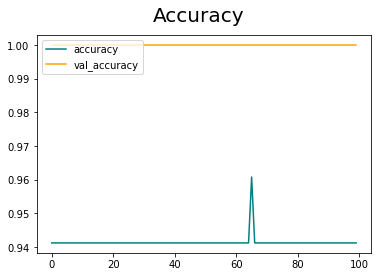

In [180]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

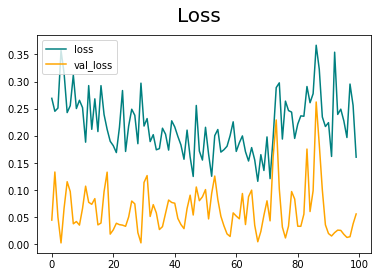

In [181]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()